# **Training Binary Classification**
# step-by-step procedure:

1. Create some classification data
2. Visualize the data points using colored scatterplots
3. Fit (“learn”) both linear and non-linear binary classification models
4. Inspect the learned models and explore the impact of hyperparameters
5. Train binary classification models on a real dataset

import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split  # used to automatically split the dataset
from sklearn.preprocessing import StandardScaler  # used later to automatically standardize the input data
from sklearn.datasets import make_classification, make_moons, make_circles  # pre-built synthetic classification data

# classifier modules from scikit learn:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  #support vector classification
from sklearn.neighbors import KNeighborsClassifier

create three types of data (simples, moons, circles), and each iteration run with one of them

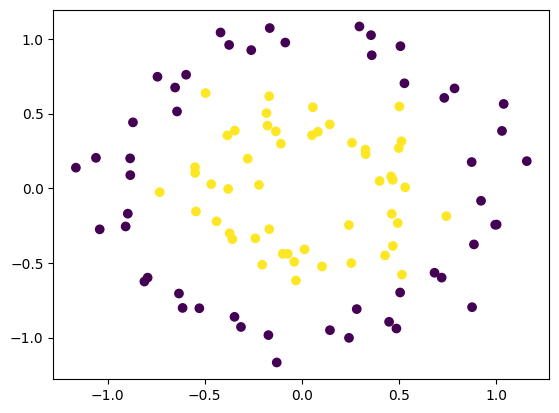

In [2]:
#x,y=make_classification(n_samples=100,n_features=2,random_state=1, n_redundant=0, n_clusters_per_class=1)
#x,y=make_moons(noise=0.1, random_state=42)
x,y=make_circles(noise=0.1, factor=0.5, random_state=42)
plt.scatter(x[:,0],x[:,1],c=y)

Why do we use probability=True? If we don't write that, we cannot use predict_probability, and we counter-error

In [50]:
x_tr, x_te, y_tr, y_te=train_test_split(x,y,test_size=0.3,random_state=1)

print("\t\t Te \t\t Tr")
model1=LogisticRegression().fit(x_tr,y_tr)

print("logistic \t %0.2f\t\t %0.2f" %(model1.score(x_te,y_te),model1.score(x_tr,y_tr)))

model2=KNeighborsClassifier(n_neighbors=3).fit(x_tr,y_tr)
print("k-near \t\t %.2f \t\t %0.2f" % (model2.score(x_te,y_te),model2.score(x_tr,y_tr)))

model3=SVC(kernel="poly",C=1,gamma=1,probability=True).fit(x_tr,y_tr)
print("poly \t\t %0.2f \t\t %.2f" %(model3.score(x_te,y_te),model3.score(x_tr,y_tr)))

model4=SVC(kernel="rbf",gamma=2, C=1, probability=True).fit(x_tr,y_tr)
print("rbf \t\t %0.2f \t\t %0.2f" %( model4.score(x_te,y_te),model4.score(x_tr,y_tr)))

model5=SVC(kernel="linear",probability=True).fit(x_tr,y_tr)
print("kernel-linear \t %0.2f \t\t %0.2f"%(model5.score(x_te,y_te),model5.score(x_tr,y_tr)))



		 Te 		 Tr
logistic 	 0.37		 0.60
k-near 		 0.97 		 0.99
poly 		 0.53 		 0.67
rbf 		 0.97 		 0.97
kernel-linear 	 0.40 		 0.61


According to the accuracy of models, the best model with this hyperplane is kernel RBF with accuracy in test 0.97%

# **Lets plot models**

first we use Mashgrid for creat our 2 dimension graph

In [4]:
#mashgrid
x1_min, x1_max= x[:,0].min() - 1, x[:,0].max() +1
x2_min, x2_max= x[:,1].min() - 1, x[:,1].max() +1
xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,0.01),
                    np.arange(x2_min,x2_max,0.01))

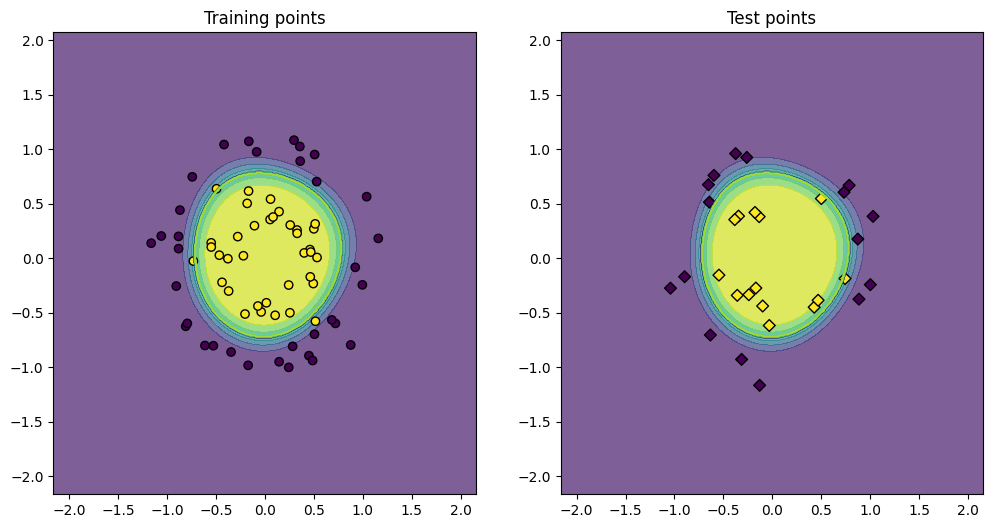

In [5]:
y_predict=model4.predict_proba(np.c_[xx1.ravel(),xx2.ravel()])
y_predict=y_predict[:,1].reshape(xx1.shape)
#plt.contourf(xx1,xx2,y_predict,alpha=0.7)


y_predict_binary=model4.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_predict_binary=y_predict_binary.reshape(xx1.shape)
#plt.contour(xx1,xx2,y_predict_binary,colors="k")

# put the result into a color plot:
figure = plt.figure(figsize=(12, 6)) # create a large figure to include two panels
ax = plt.subplot(1, 2, 1) # the figure is made by 1x2 subplots, and we plot on the first one
plt.contourf(xx1, xx2, y_predict, alpha=0.7)
plt.contour(xx1, xx2, y_predict_binary) # use the binary values to plot the decision boundary
plt.scatter(x_tr[:, 0], x_tr[:, 1], c=y_tr, edgecolors="k") # plot the test data on top of it
plt.title("Training points")

# do the same with test data points:
ax = plt.subplot(1, 2, 2) # the figure is made by 1x2 subplots, and we plot on the second one
plt.contourf(xx1, xx2, y_predict, alpha=0.7)
plt.contour(xx1, xx2, y_predict_binary)
plt.scatter(x_te[:, 0], x_te[:, 1], c=y_te, marker='D', edgecolors="k")
plt.title("Test points");


We can even visualize all models in one single figure:

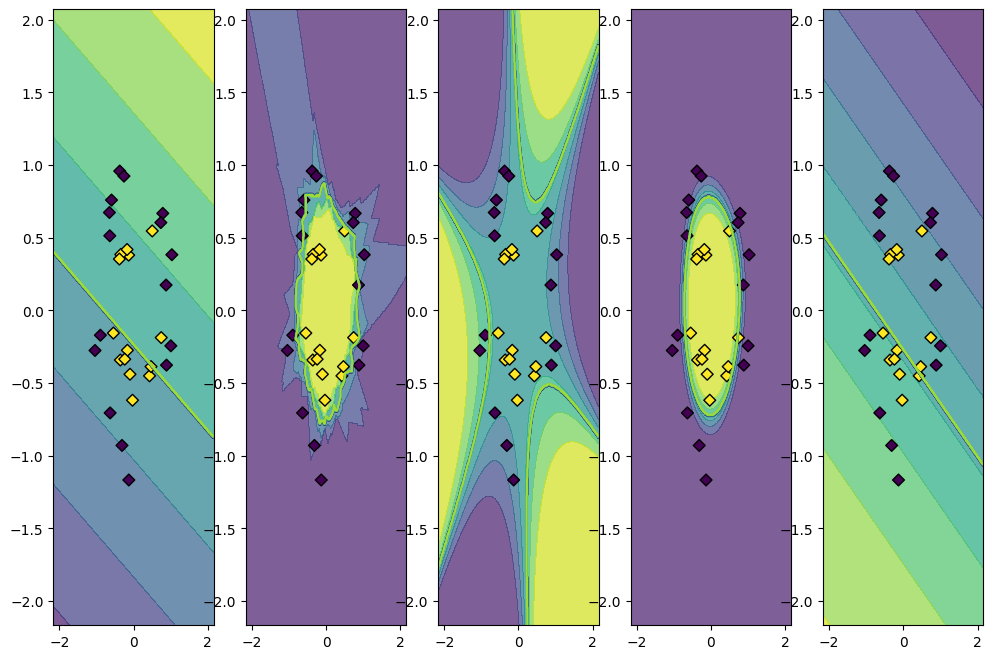

In [6]:
classifiers=(model1,model2,model3,model4,model5)
fig=plt.figure(figsize=(12,8))
i=1
for model in classifiers:
    y_predict=model.predict_proba(np.c_[xx1.ravel(),xx2.ravel()])
    y_predict=y_predict[:,1].reshape(xx1.shape)
    ax=plt.subplot(1,len(classifiers),classifiers.index(model)+1)
    plt.contourf(xx1,xx2,y_predict,alpha=0.7)
    y_pre_binary=model.predict(np.c_[xx1.ravel(),xx2.ravel()])
    y_pre_binary=y_pre_binary.reshape(xx1.shape)
    plt.contour(xx1,xx2,y_pre_binary)
    i=i+1
    ax.scatter(x_te[:, 0], x_te[:, 1], c=y_te, marker='D', edgecolors="k"); # only show test points